In [118]:
file = r'C:\Users\User\Downloads\AccidentAnalysis\cleaned.csv'

In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv(file)
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [121]:
df.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Driving_experience']=le.fit_transform(df['Driving_experience'])
df.head()
label_mapping_Driving_experience = dict(zip(le.classes_, le.transform(le.classes_)))


In [123]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [124]:
df.describe()

,Driving_experience,Accident_severity
count,12316.000000,12316.000000
mean,2.215654,1.832819
std,1.608070,0.406082
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,7.000000,2.000000


In [125]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,0,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,3,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,0,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,2,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,1,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [126]:
junctionTypes=df['Types_of_Junction'].unique()
Lanes_or_MediansTypes = df['Lanes_or_Medians'].unique()
Road_surface_type=df['Road_surface_type'].unique()


In [127]:
def CountingAccidentsByFeature(df):
    junctionValues=[]
    #junctionTypes=df['Types_of_Junction'].unique()
    for i in junctionTypes:
        junctionValues.append(df[df['Types_of_Junction'] == i].shape[0])

    Lanes_or_MediansValues=[]
    #Lanes_or_MediansTypes = df['Lanes_or_Medians'].unique()
    for i in Lanes_or_MediansTypes:
        Lanes_or_MediansValues.append(df[df['Lanes_or_Medians'] == i].shape[0])

    Road_surface_typeValues=[]
    #Road_surface_type=df['Road_surface_type'].unique()
    for i in Road_surface_type:
        Road_surface_typeValues.append(df[df['Road_surface_type'] == i].shape[0])
    
    return junctionValues,Lanes_or_MediansValues,Road_surface_typeValues

In [128]:
junctionValues,Lanes_or_MediansValues,Road_surface_typeValues=CountingAccidentsByFeature(df)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'No junction'),
  Text(1, 0, 'Y Shape'),
  Text(2, 0, 'Crossing'),
  Text(3, 0, 'O Shape'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'T Shape'),
  Text(7, 0, 'X Shape')])

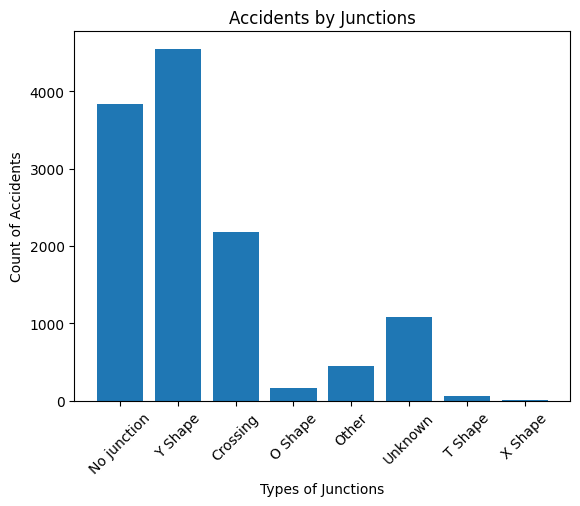

In [129]:
plt.title('Accidents by Junctions')
plt.xlabel('Types of Junctions')
plt.ylabel('Count of Accidents')
plt.bar(junctionTypes,junctionValues)
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Undivided Two way'),
  Text(2, 0, 'other'),
  Text(3, 0, 'Double carriageway (median)'),
  Text(4, 0, 'One way'),
  Text(5, 0, 'Two-way (divided with solid lines road marking)'),
  Text(6, 0, 'Two-way (divided with broken lines road marking)')])

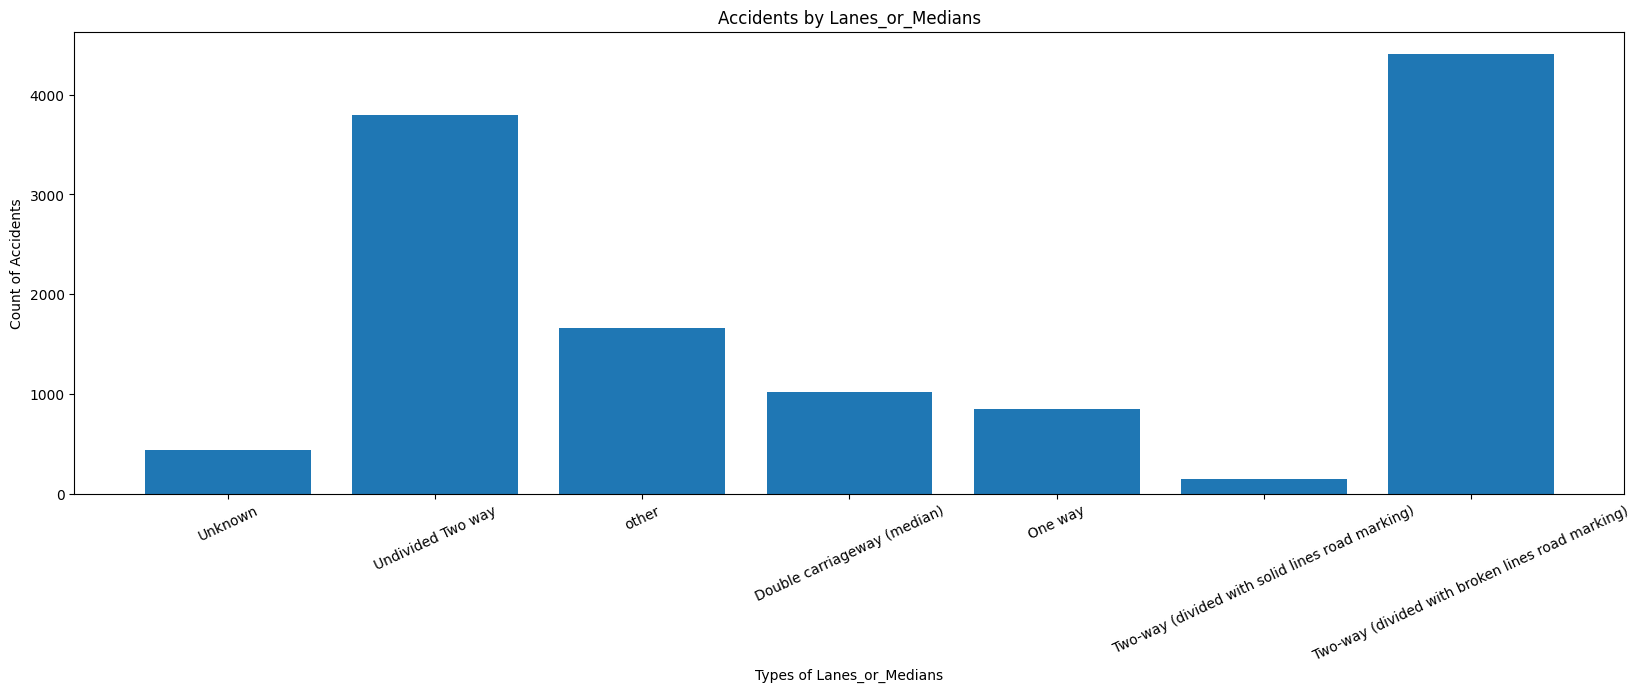

In [130]:
plt.figure(figsize=(20,6))
plt.title('Accidents by Lanes_or_Medians')
plt.xlabel('Types of Lanes_or_Medians')
plt.ylabel('Count of Accidents')
plt.bar(Lanes_or_MediansTypes,Lanes_or_MediansValues)
plt.xticks(rotation=25)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asphalt roads'),
  Text(1, 0, 'Earth roads'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Asphalt roads with some distress'),
  Text(4, 0, 'Gravel roads'),
  Text(5, 0, 'Other')])

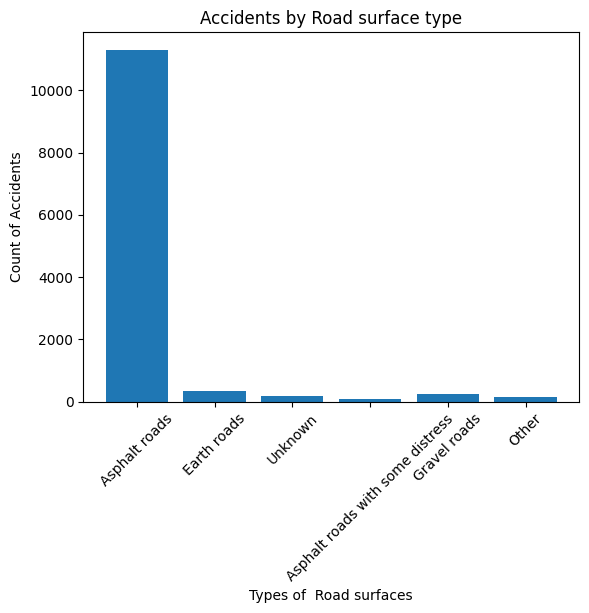

In [131]:
plt.title('Accidents by Road surface type')
plt.xlabel('Types of  Road surfaces')
plt.ylabel('Count of Accidents')
plt.bar(Road_surface_type,Road_surface_typeValues)
plt.xticks(rotation=45)

In [132]:
df['Accident_severity'].unique()

array([2, 1, 0])

In [135]:
df_severity_2 = df[df['Accident_severity'] == 2]
df_severity_2.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,0,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,3,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
3,18-30,Male,Junior high school,Employee,2,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,1,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
5,31-50,Male,Unknown,Unknown,6,Unknown,Y Shape,Unknown,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,Overloading,2


In [137]:
junctionTypes=df_severity_2['Types_of_Junction'].unique()
Lanes_or_MediansTypes = df_severity_2['Lanes_or_Medians'].unique()
Road_surface_type=df_severity_2['Road_surface_type'].unique()

In [138]:
junctionValues_2,Lanes_or_MediansValues_2,Road_surface_typeValues_2=CountingAccidentsByFeature(df_severity_2)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'No junction'),
  Text(1, 0, 'Y Shape'),
  Text(2, 0, 'Crossing'),
  Text(3, 0, 'O Shape'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'T Shape'),
  Text(7, 0, 'X Shape')])

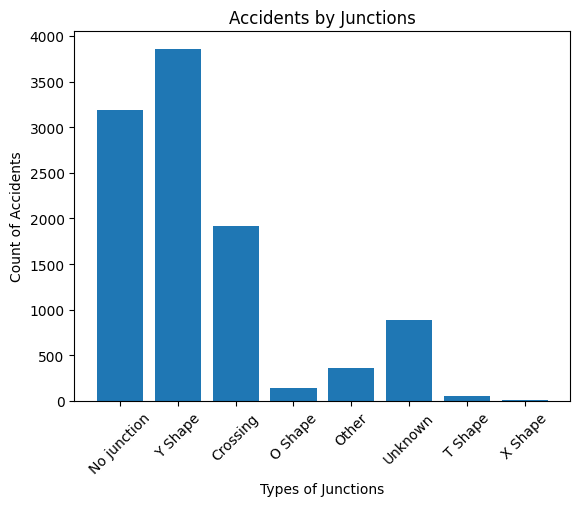

In [142]:
plt.title('Accidents by Junctions')
plt.xlabel('Types of Junctions')
plt.ylabel('Count of Accidents')
plt.bar(junctionTypes,junctionValues_2)
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Undivided Two way'),
  Text(2, 0, 'other'),
  Text(3, 0, 'Double carriageway (median)'),
  Text(4, 0, 'One way'),
  Text(5, 0, 'Two-way (divided with solid lines road marking)'),
  Text(6, 0, 'Two-way (divided with broken lines road marking)')])

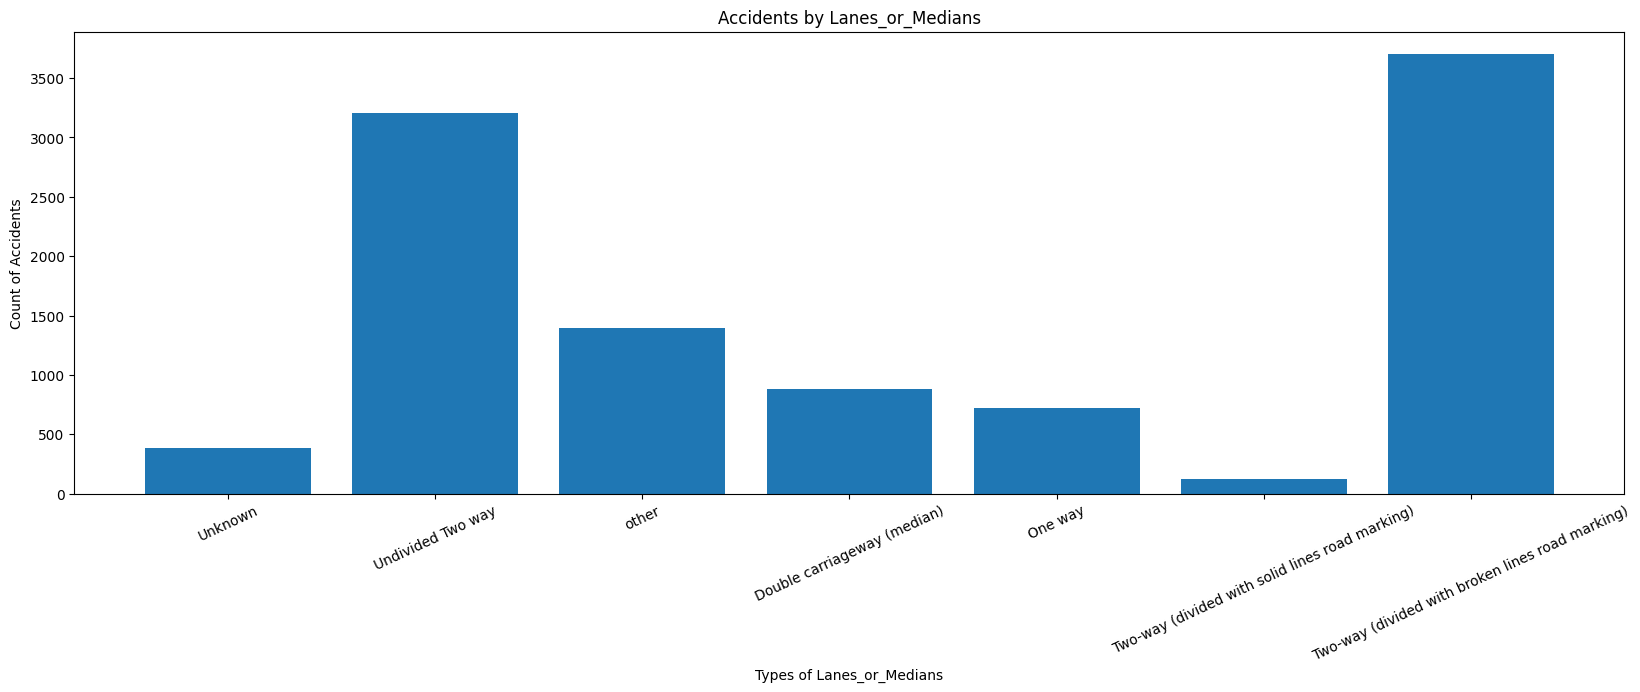

In [141]:
plt.figure(figsize=(20,6))
plt.title('Accidents by Lanes_or_Medians')
plt.xlabel('Types of Lanes_or_Medians')
plt.ylabel('Count of Accidents')
plt.bar(Lanes_or_MediansTypes,Lanes_or_MediansValues_2)
plt.xticks(rotation=25)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asphalt roads'),
  Text(1, 0, 'Earth roads'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Asphalt roads with some distress'),
  Text(4, 0, 'Gravel roads'),
  Text(5, 0, 'Other')])

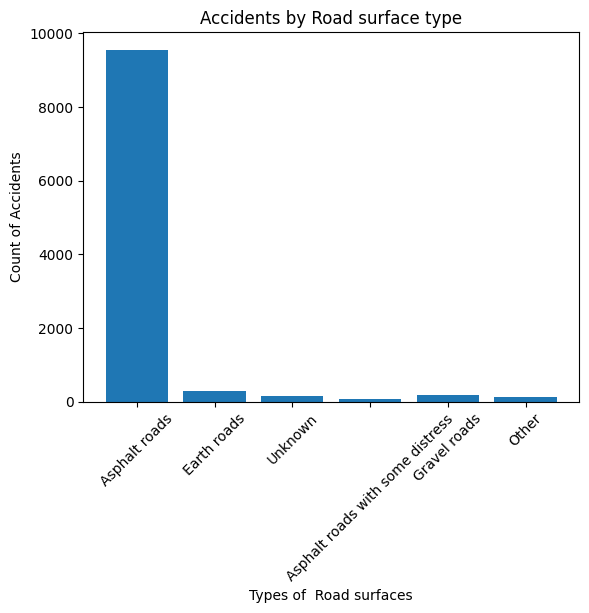

In [140]:
plt.title('Accidents by Road surface type')
plt.xlabel('Types of  Road surfaces')
plt.ylabel('Count of Accidents')
plt.bar(Road_surface_type,Road_surface_typeValues_2)
plt.xticks(rotation=45)